In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data
y = boston.target


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

c:\Users\rahul-al\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

In [10]:
model = Sequential()
model.add(Dense(512, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               7168      
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 336,129
Trainable params: 336,129
Non-tr

Epoch 1/300
11/11 [==============================] - 1s 18ms/step - loss: 401.8124 - mae: 17.2037 - val_loss: 128.7926 - val_mae: 9.0986
Epoch 2/300
11/11 [==============================] - 0s 8ms/step - loss: 77.4563 - mae: 6.6909 - val_loss: 50.4813 - val_mae: 5.0726
Epoch 3/300
11/11 [==============================] - 0s 8ms/step - loss: 41.3039 - mae: 4.7884 - val_loss: 38.4294 - val_mae: 4.6077
Epoch 4/300
11/11 [==============================] - 0s 7ms/step - loss: 28.4629 - mae: 3.8833 - val_loss: 24.3330 - val_mae: 3.5737
Epoch 5/300
11/11 [==============================] - 0s 7ms/step - loss: 19.5073 - mae: 3.2396 - val_loss: 19.7227 - val_mae: 3.0170
Epoch 6/300
11/11 [==============================] - 0s 7ms/step - loss: 16.8761 - mae: 3.0433 - val_loss: 18.4108 - val_mae: 3.0175
Epoch 7/300
11/11 [==============================] - 0s 7ms/step - loss: 14.4852 - mae: 2.7704 - val_loss: 25.7535 - val_mae: 3.6600
Epoch 8/300
11/11 [==============================] - 0s 7ms/step 

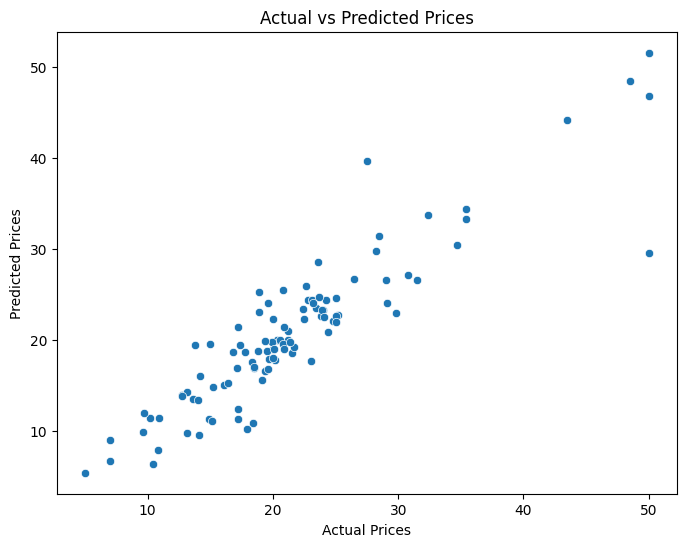

In [11]:

# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam' , metrics=['mae'])
# model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)
history = model.fit(X_train_scaled, y_train, epochs=300,validation_split=0.2, verbose=1)
# Make predictions on the test set
y_pred = model.predict(X_test_scaled).flatten()

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot the predicted prices against the actual prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


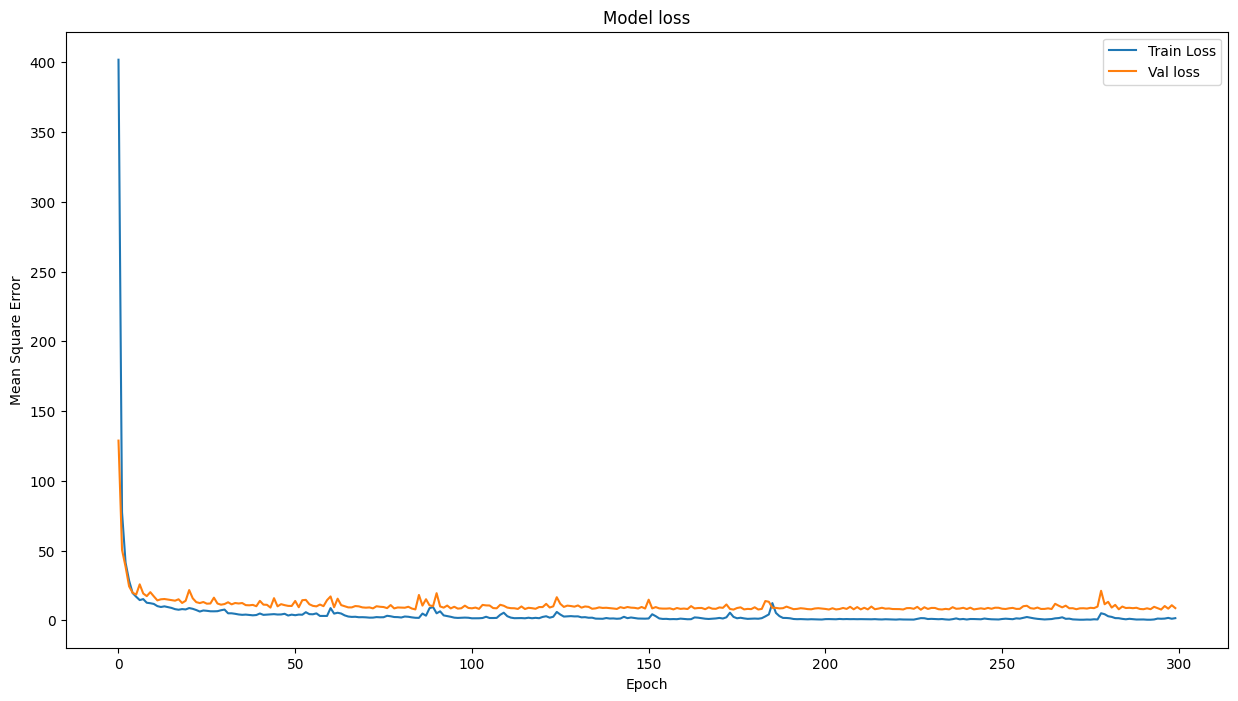

In [12]:
plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],label = 'Val loss')
plt.title('Model loss')
plt.legend()